In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Context

In [2]:
titanic_data = pd.read_csv('train.csv', index_col='PassengerId')
print(titanic_data.shape)
titanic_data.head()

(100000, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [4]:
titanic_data.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

Больше всего значений пропущено для Cabin. Прям подчищать все строки с NA не имеет пока смысла, будем аккуратно удалять эти поля только при анализе текстовых колонок

In [5]:
print(titanic_data.shape)
titanic_data.head(10)

(100000, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


# Data exploration

## Просто знакомство со значениями в колонках

In [6]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


<AxesSubplot:title={'center':'Гистограмма распределения возрастов'}, xlabel='Age', ylabel='Count'>

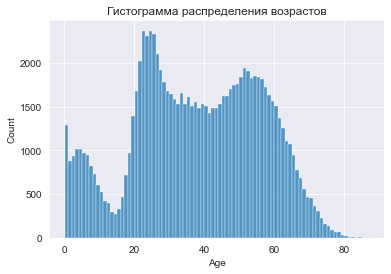

In [7]:
sns.set_style('darkgrid')
plt.title('Гистограмма распределения возрастов')
sns.histplot(titanic_data['Age'], binwidth=1)

In [8]:
print('male and female ratio')
titanic_data['Sex'].value_counts() / titanic_data['Sex'].count()

male and female ratio


male      0.56114
female    0.43886
Name: Sex, dtype: float64

<AxesSubplot:title={'center':'Гистограмма распределения стоимости билета'}, xlabel='Fare', ylabel='Count'>

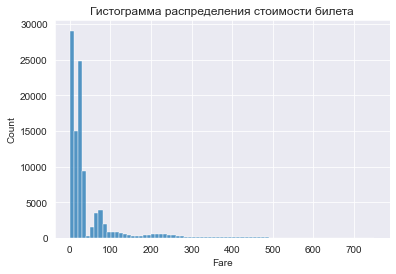

In [9]:
plt.title('Гистограмма распределения стоимости билета')
sns.histplot(titanic_data['Fare'], binwidth=10)

<AxesSubplot:title={'center':'Гистограмма распределения класса'}, xlabel='Pclass', ylabel='Count'>

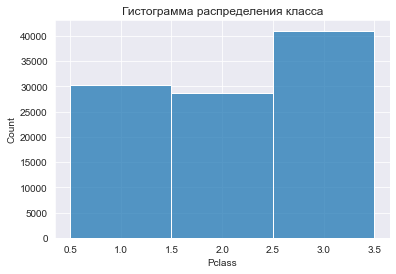

In [10]:
plt.title('Гистограмма распределения класса')
sns.histplot(titanic_data['Pclass'], bins=[0.5,1.5,2.5,3.5])

In [11]:
titanic_data['Ticket'].value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

In [12]:
titanic_data['Embarked'].value_counts() #порты отправления

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

Количество человек в каждой кабине:

In [13]:
titanic_data['Cabin'].value_counts()

C19828    6
C6906     5
C13699    5
C14534    5
B11110    5
         ..
A21234    1
A4905     1
C7208     1
A5788     1
D17243    1
Name: Cabin, Length: 26992, dtype: int64

Видимо сектор какой-то/этаж?

## Процент выживших людей

0.42774

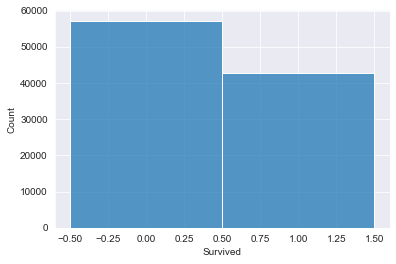

In [14]:
sns.histplot(titanic_data['Survived'], bins=[-0.5,0.5,1.5])
titanic_data.Survived.mean()

## Зависимость выживаемости от **пола**

Sex
female    0.711525
male      0.205795
Name: Survived, dtype: float64

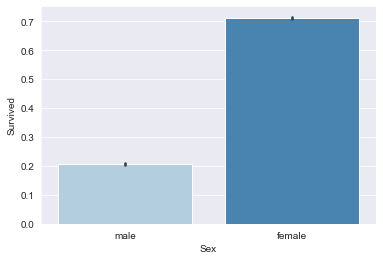

In [15]:
titanic_data_sex = titanic_data.copy()
sns.barplot(data=titanic_data_sex, x='Sex', y='Survived', palette = 'Blues')
titanic_data_sex.groupby('Sex').Survived.mean()

## Зависимость выживаемости от **сектора**

Cabin
A    0.274616
T    0.437500
E    0.617496
B    0.630192
C    0.712220
D    0.732197
G    0.836100
F    0.837104
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

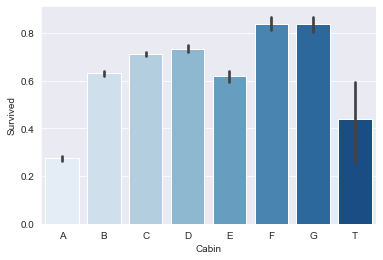

In [16]:
titanic_data_cabin = titanic_data.copy()
titanic_data_cabin = titanic_data_cabin[['Survived', 'Cabin']]
titanic_data_cabin = titanic_data_cabin.dropna()
titanic_data_cabin.Cabin = titanic_data_cabin.Cabin.apply(lambda s: s[0])

titanic_data_cabin_ratio = titanic_data_cabin.groupby('Cabin').Survived.mean()
print(titanic_data_cabin_ratio.sort_values())

sns.barplot(data=titanic_data_cabin, x='Cabin', y='Survived', palette = 'Blues', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

### Видим, что F,G - это самые нижние этажи. Видимо ребята были ближе всего к шлюпкам. На картинке нет T - Но скорее всего он выше A
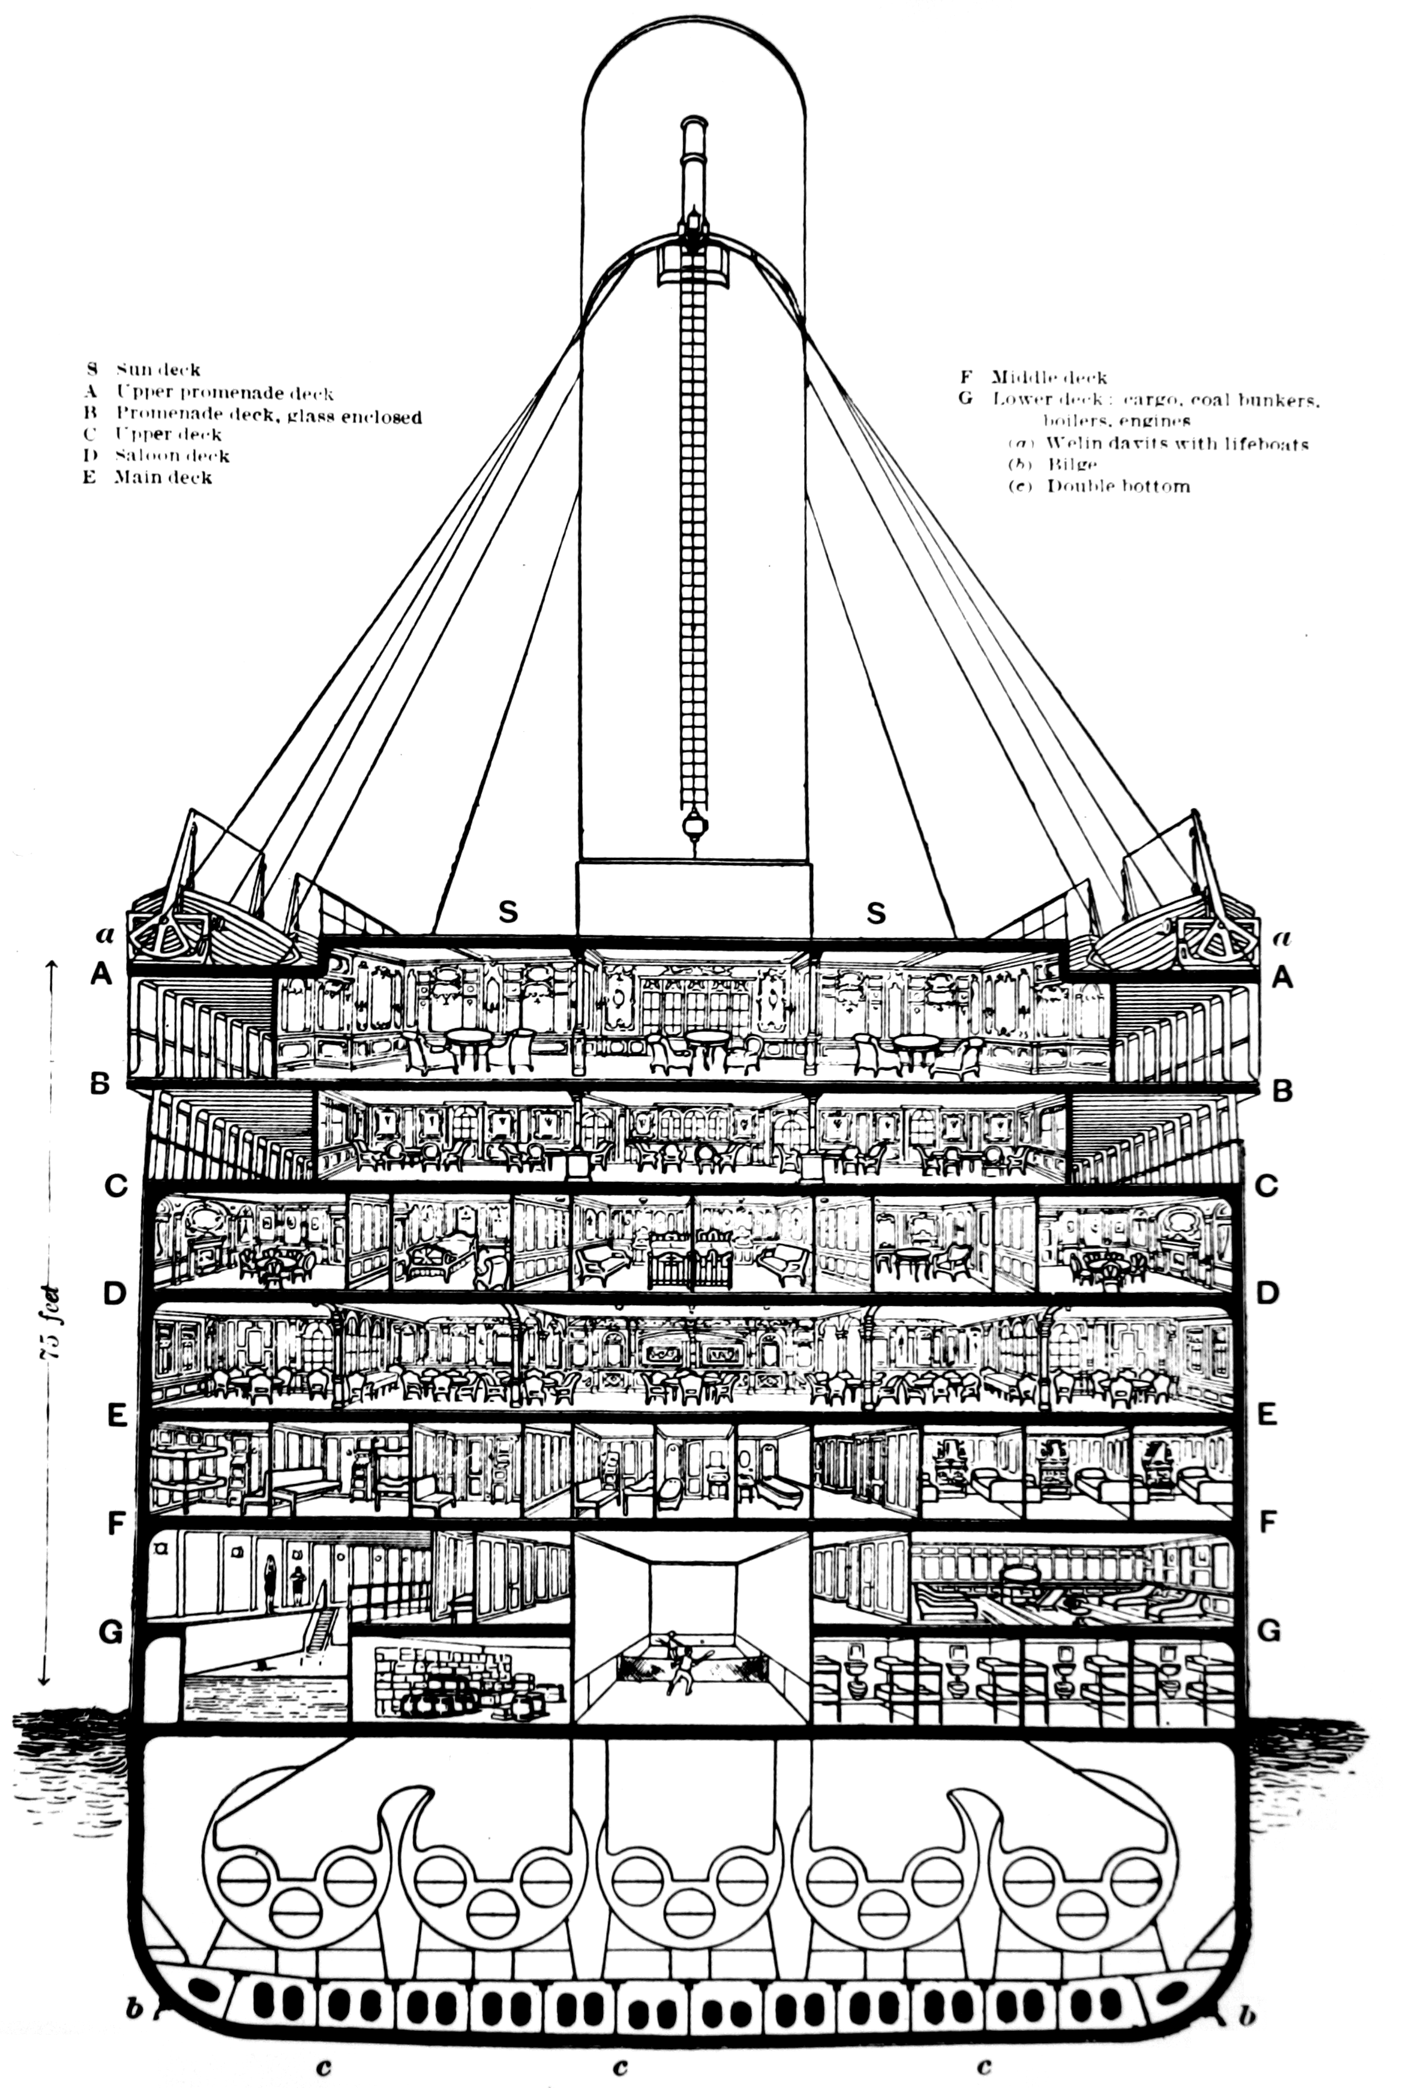

## Зависимость выживаемости от **билета**

<AxesSubplot:xlabel='Ticket', ylabel='Survived'>

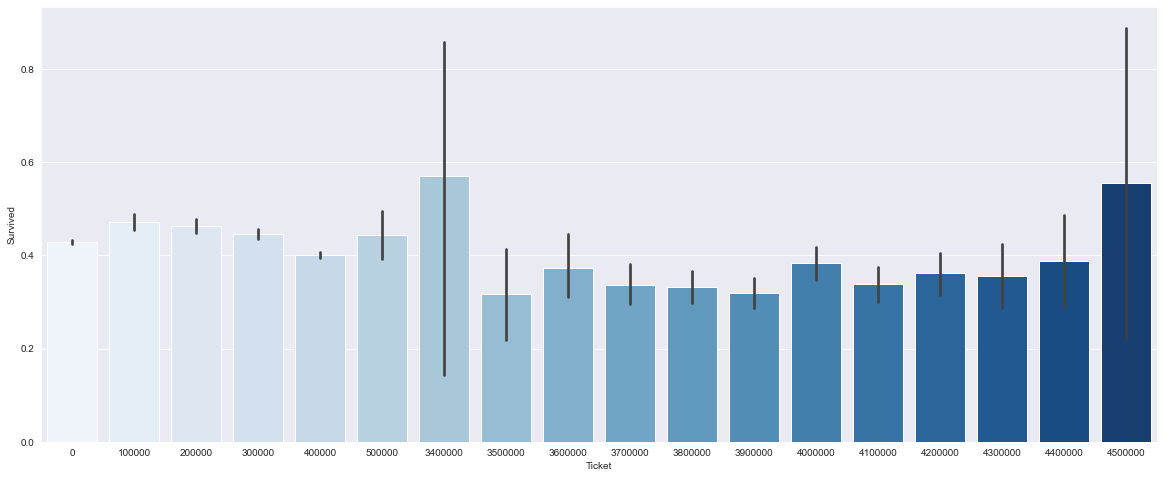

In [17]:
titanic_data_ticket = titanic_data.copy()
titanic_data_ticket = titanic_data_ticket[['Survived', 'Ticket']].dropna()
titanic_data_ticket_discrete = titanic_data_ticket.copy()
titanic_data_ticket_discrete.Ticket = titanic_data_ticket_discrete.Ticket.str.extract(r'(\d+)').fillna(0)
titanic_data_ticket_discrete.Ticket = titanic_data_ticket_discrete.Ticket.astype(int)
titanic_data_ticket_discrete.Ticket = titanic_data_ticket_discrete.Ticket.map(lambda s: math.floor(s/100000)*100000)

plt.figure(figsize=(20,8))
sns.barplot(data=titanic_data_ticket_discrete, x='Ticket', y='Survived', palette = 'Blues')

## Зависимость выживаемости от **порта посадки**

Embarked
C    0.751296
Q    0.596976
S    0.315294
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

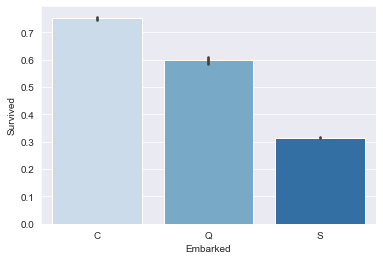

In [18]:
titanic_data_emb = titanic_data.copy()
titanic_data_emb = titanic_data_emb[['Survived', 'Embarked', 'Pclass']].dropna()

print(titanic_data_emb.groupby('Embarked').Survived.mean())
sns.barplot(data=titanic_data_emb, x='Embarked', y='Survived', palette = 'Blues', order=['C', 'Q', 'S'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

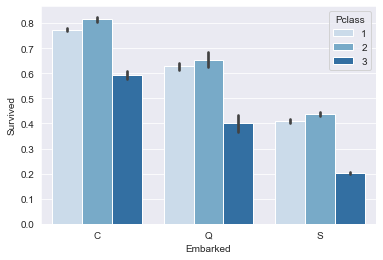

In [19]:
sns.barplot(data=titanic_data_emb, x='Embarked', y='Survived', hue='Pclass', palette = 'Blues', order=['C', 'Q', 'S'])

<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

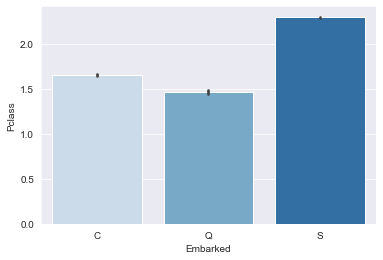

In [20]:
sns.barplot(data=titanic_data_emb, x='Embarked', y='Pclass', palette = 'Blues', order=['C', 'Q', 'S'])

## Зависимость выживаемости от **возраста**

<AxesSubplot:xlabel='Age', ylabel='Density'>

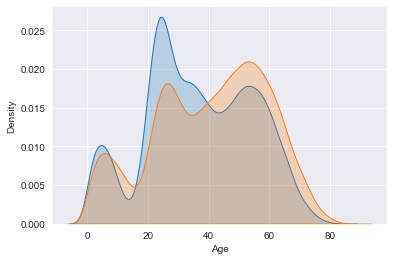

In [21]:
titanic_data_age = titanic_data[['Age', 'Survived']].dropna()
sns.kdeplot(titanic_data_age[titanic_data_age.Survived==0].Age, label='dead', shade=True)
sns.kdeplot(titanic_data_age[titanic_data_age.Survived==1].Age, label='alive', shade=True)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

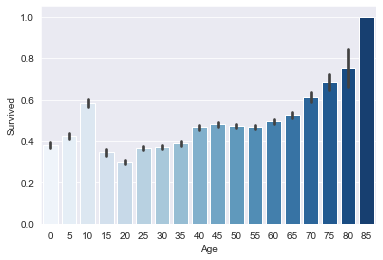

In [22]:
titanic_data_age_discrete = titanic_data_age.copy()
titanic_data_age_discrete.Age = titanic_data_age_discrete.Age.map(lambda s: math.floor(s/5)*5)
sns.barplot(data=titanic_data_age_discrete, x='Age', y='Survived', palette = 'Blues')

## Зависимость выживаемости от **класса**

Pclass
1    0.579779
2    0.525018
3    0.247305
Name: Survived, dtype: float64

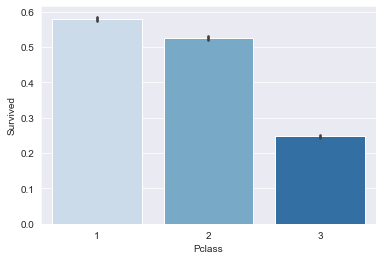

In [23]:
sns.barplot(data=titanic_data, x = 'Pclass', y='Survived', palette = 'Blues')
titanic_data.groupby('Pclass').Survived.mean()

## Зависимость выживаемости от **стоимости билета**

<AxesSubplot:xlabel='Fare', ylabel='Density'>

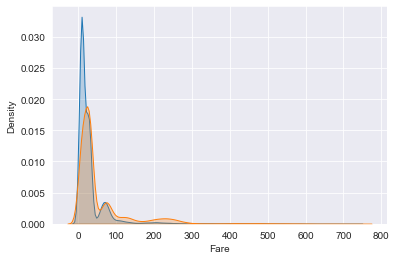

In [24]:
titanic_data_fare = titanic_data[['Fare', 'Survived']].dropna()
sns.kdeplot(titanic_data_fare[titanic_data_fare.Survived==0].Fare, label='dead', shade=True)
sns.kdeplot(titanic_data_fare[titanic_data_fare.Survived==1].Fare, label='alive', shade=True)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

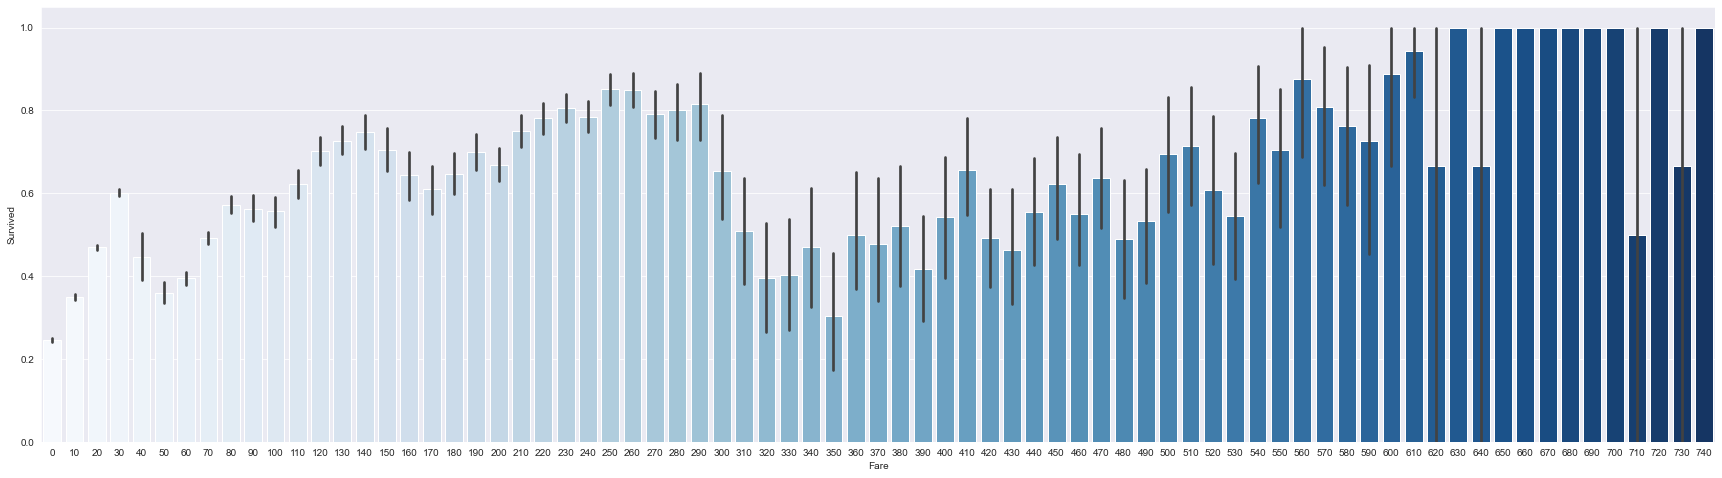

In [25]:
titanic_data_fare_discrete = titanic_data_fare.copy()
titanic_data_fare_discrete.Fare = titanic_data_fare_discrete.Fare.map(lambda s: math.floor(s/10)*10)
plt.figure(figsize=(30,8))
sns.barplot(data=titanic_data_fare_discrete, x='Fare', y='Survived', palette = 'Blues')

## Зависимость выживаемости от **количества супруг/братьев/сестёр**

SibSp
2    0.453956
1    0.433748
0    0.426843
3    0.400000
8    0.385135
4    0.375856
5    0.189394
Name: Survived, dtype: float64

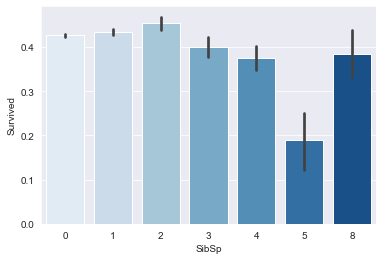

In [26]:
sns.barplot(data=titanic_data, x='SibSp', y='Survived', palette = 'Blues')
titanic_data.groupby('SibSp').Survived.mean().sort_values(ascending=False)

## Зависимость выживаемости от **количества родителей/детей**

Parch
1    0.592028
5    0.570997
3    0.492370
9    0.439394
0    0.405208
2    0.384745
4    0.284753
6    0.205882
Name: Survived, dtype: float64

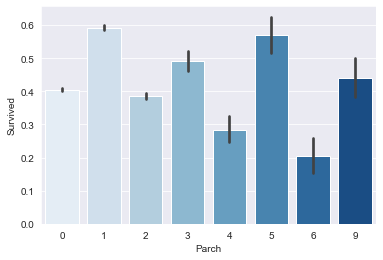

In [27]:
sns.barplot(data=titanic_data, x='Parch', y='Survived', palette = 'Blues')
titanic_data.groupby('Parch').Survived.mean().sort_values(ascending=False)

## Зависимость выживаемости от **количества родителей/детей/супруг/братьев/сестёр**

SibSp
1     0.516254
17    0.500000
2     0.482436
9     0.452229
11    0.450000
5     0.440345
10    0.414062
3     0.409194
0     0.404394
4     0.335294
6     0.325301
12    0.285714
7     0.269231
8     0.252252
13    0.200000
14    0.000000
Name: Survived, dtype: float64

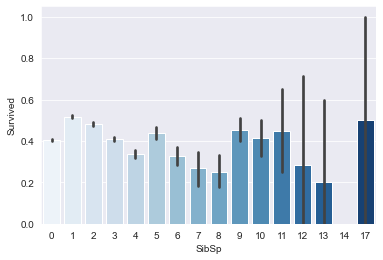

In [28]:
titanic_data_all_members = titanic_data.copy()
titanic_data_all_members.SibSp = titanic_data_all_members.SibSp + titanic_data_all_members.Parch
sns.barplot(data=titanic_data_all_members, x='SibSp', y='Survived', palette = 'Blues')
titanic_data_all_members.groupby('SibSp').Survived.mean().sort_values(ascending=False)

# Summary

1. Средний **возраст** пассажиров - 38 лет. Распределение немного странное - видно, что у него 3 доминанты - 5, 25, 50 лет.
2. Видно, что распределение **стоимости билетов** смещено влево - т.е. больше всего людей купили дешёвые билеты. 
3. Всего **выжило** 43% людей
4. *Женщин* и *мужчин* примерно поровну (женщин 43%, мужчин 56%)
5. Зависимость выживаемости от **пола** есть. *Женщины* выживали чаще, чем *мужчины* (71% всех женщин выжило, в то время как процент выживших мужчин - 20%)
6. По **кабинам** - наихудшая выживаемость в кабинах с префиксом **A** - 27%. Есть подозрение, что от **A** просто дальше всего бежать к спасательным лодкам. У **T** тоже выживаемость не самая лучшая - 43%. Лучшая выживаемость у кабин **F**, **G** - 83% от общего числа людей в каждой из кабин.
7. Какой-то зависимости выживаемости от **номера билета** не прослеживается, если смотреть только номер без букв
8. Люди, выплывшие из **C** (Cherbourg) выживали чаще (75% выживших из людей, выплыших из **C**). На втором месте **Q** (Queenstown) - 59%. На третьем месте **S** (Southampton) - 31%. Не понятно откуда взялась такая ярко-выраженная зависимость. Нужно посмотреть связь Embarked и Pclass. Видим, что есть связь. Наибольше соотношение богатых к бедным в **C** и **Q**. В **S** больше наоборот бедных. Поэтому люди из **S** умирали чаще.
9. Зависимость выживаемости от **возраста** есть. Чаще выживали совсем старики (>70) и дети ~10 лет. Видимо их чаще пытались спасти.
10. Видно, что выживаемость зависит от переменной **Pclass**. По какой-то причине самая низкая выживаемость в **Pclass**=3 (24%). Самая высокая выживаемость для **Pclass**=1 составила 57%. Судя по описанию к датасету 3й класс соответствует самому низкому социальному и экономическому статусу. Следовательно, богатых спасали гораздо чаще, чем бедных.
11. Зависимость выживаемости от **стоимости билета** есть. Чаще всего выживали люди с самыми дорогими билетами. Начиная с ~630 за билет выживаемость стремится к 100%. Люди с самыми дешёвыми и со средними по стоимости билетами умирали чаще других.
12. Зависимость выживаемости от **количества супруг/братьев/сестёр** неоднозначная. Видно, что с увеличением **SibSp** шанс выжить спадает, но для **SibSp** = 8 он снова высокий. 
13. Зависимость выживаемости от **количества родителей/детей** выглядит совсем странно. Почему-то для нечётных значений шанс выжить выше, чем для чётных. Сложно сказать чем такое обусловлено. Нужно смотреть совокупность **SibSp** и **Parch**
14. По сумме **SibSp** и **Parch** можно лишь сказать, что с увеличением общего числа родственников вырастает стандартное отклонение относительно средней выживаемости. Т.е. увеличение кол-ва родственников приводит к большей неопределённости исхода для члена семьи. Наибольший шанс выжить у людей с всего одним родственником.